# Multidimensional Scaling

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def create_dissimilarity_matrix(n):
    # Create a random dissimilarity matrix (symmetric and zero diagonal)
    dissimilarity_matrix = np.random.rand(n, n)
    dissimilarity_matrix = (dissimilarity_matrix + dissimilarity_matrix.T) / 2  # Make it symmetric
    np.fill_diagonal(dissimilarity_matrix, 0)  # Zero diagonal
    return dissimilarity_matrix

def double_centering(dissimilarity_matrix):
    n = dissimilarity_matrix.shape[0]
    
    # Row centering: Subtract row means
    row_means = np.mean(dissimilarity_matrix, axis=1, keepdims=True)
    dissimilarity_matrix -= row_means

    # Column centering: Subtract column means
    col_means = np.mean(dissimilarity_matrix, axis=0, keepdims=True)
    dissimilarity_matrix -= col_means

    # Scale by -1/2
    double_centered_matrix = -0.5 * dissimilarity_matrix

    return double_centered_matrix

def classical_mds(double_centered_matrix, num_dimensions):
    # Eigenvalue decomposition
    eigenvalues, eigenvectors = np.linalg.eigh(double_centered_matrix)

    # Selecting the top num_dimensions eigenvectors
    top_indices = np.argsort(eigenvalues)[::-1][:num_dimensions]
    top_eigenvalues = eigenvalues[top_indices]
    top_eigenvectors = eigenvectors[:, top_indices]

    print("\nTop Eigenvalues:")
    print(top_eigenvalues)
    
    print("\nTop Eigenvectors:")
    print(top_eigenvectors)
    
    # Computing coordinates in low-dimensional space
    coordinates = np.dot(top_eigenvectors, np.diag(np.sqrt(top_eigenvalues)))
    print("\nCoordinates:")
    print(coordinates)
    
    return coordinates

def visualize_result(coordinates):
    # Scatter plot of the low-dimensional coordinates
    plt.scatter(coordinates[:, 0], coordinates[:, 1])
    plt.title('MDS: Visualization of Low-Dimensional Coordinates')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.show()

Original Dissimilarity Matrix:
[[0.         0.55335441 0.37628922 0.3910315  0.38393577]
 [0.55335441 0.         0.918043   0.45267863 0.42378322]
 [0.37628922 0.918043   0.         0.36854777 0.23698481]
 [0.3910315  0.45267863 0.36854777 0.         0.32879549]
 [0.38393577 0.42378322 0.23698481 0.32879549 0.        ]]

Double-Centered Matrix:
[[ 0.16358443 -0.04876794 -0.00503479 -0.04828707 -0.06149462]
 [-0.04876794  0.2922341  -0.21158685 -0.0147858  -0.01709351]
 [-0.00503479 -0.21158685  0.20263521 -0.01751982  0.03150625]
 [-0.04828707 -0.0147858  -0.01751982  0.13087292 -0.05028023]
 [-0.06149462 -0.01709351  0.03150625 -0.05028023  0.0973621 ]]

Eigenvalues:
[0.46975043 0.20959227]

Eigenvectors:
[[ 0.10177684  0.86397831]
 [-0.77326889 -0.05932711]
 [ 0.6209522  -0.17366058]
 [-0.02391302 -0.21354144]
 [ 0.07445287 -0.41744918]]

Coordinates:
[[ 0.06975616  0.39554005]
 [-0.52998567 -0.02716069]
 [ 0.42559034 -0.07950398]
 [-0.01638958 -0.09776194]
 [ 0.05102876 -0.19111345]

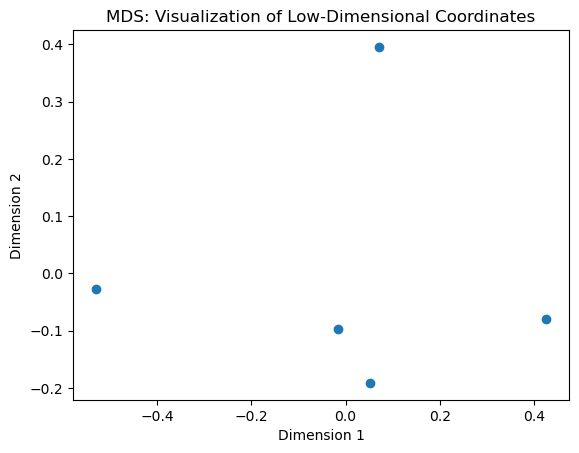

In [2]:
# Example usage
np.random.seed(42)  # for reproducibility
num_data_points = 5
num_dimensions = 2

# Step 1: Create a random dissimilarity matrix
dissimilarity_matrix = create_dissimilarity_matrix(num_data_points)
print("Original Dissimilarity Matrix:")
print(dissimilarity_matrix)

# Step 2: Double centering
double_centered_matrix = double_centering(dissimilarity_matrix)
print("\nDouble-Centered Matrix:")
print(double_centered_matrix)

# Step 3: Perform MDS
coordinates = classical_mds(double_centered_matrix, num_dimensions)

# Step 4: Visualize the result
visualize_result(coordinates)

## MDS - IRIS

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.manifold import MDS

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Apply MDS
mds = MDS(n_components=2, max_iter=300, random_state=42, verbose=1)  # Set verbose to 1 for intermediate output
X_mds = mds.fit_transform(X)

# Print intermediate values
print("Stress: ", mds.stress_)
print("Number of iterations: ", mds.n_iter_)

# Plot the 2D representation
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_mds[:, 0], X_mds[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.title('MDS Visualization of Iris Dataset')
plt.xlabel('MDS Component 1')
plt.ylabel('MDS Component 2')
plt.legend(*scatter.legend_elements(), title='Classes')
plt.show()
